In [30]:
import numpy as np
import pandas as pd

%matplotlib inline

In [31]:
df = pd.read_csv("data.csv")

In [32]:
inputs = ['KS4_GPA5_Qtg.PV', 'KS4_GPA5_TC_T1.PV', 'KS4_GPA5_Nst.PV']
outputs = ['KS4_GPA5_Nvd.PV', 'KS4_GPA5_Nnd.PV', 'KS4_GPA5_T4.PV', 'KS4_GPA5_Pk.PV']

# Задача - построить предсказательую модель outputs по inputs
- Дана телеметрия ГТУ. 
- Загрузить данные. 
- Проанализировать статистики, сделать EDA (разведовательный/исследовательский анализ данных). 
- Найти пропуски и выбросы в данных. 
- Заполнить пропуски линейной регрессией. С помощью таблицы корреляций найдите второй признак, который имеет сильную взаимосвязь с первым признаком. Создаете отдельный датафрейм из этих признаков, исключаете пропуски (не удаляете), обучаете линейну регрессию. Затем прогнозируете на исключенных данных с пропусками и заполняете эти пропуски предсказанным значением.
- Сделать визуализации (гистограммы, боксплоты, диаграммы рассеивания). 
- Построить матрицу корреляций.
- Обучить несколько моделей с подбором гиперпараметров. Можно классический ML и DL, ансамбли. В качестве метрики взять R^2&.
- В качестве baseline использовать множественную регрессию. С ней вы будете сравнивать другие модели.

**Результатом решения задачи является код эксперимента в Jupyter Notebook, содержащий качественное обоснование выбора той или иной архитектуры (метода). В качестве base line рекомендуется выбрать модель множественной регрессии.** 

В качестве шаблона EDA можете использовать EDA_AUTO.ipynb

In [33]:
df

,KS4_GPA5_Qtg.PV,KS4_GPA5_TC_T1.PV,KS4_GPA5_Nst.PV,KS4_GPA5_Nvd.PV,KS4_GPA5_Nnd.PV,KS4_GPA5_T4.PV,KS4_GPA5_Pk.PV
0,50.074285,50.656771,500.475537,1207.542773,912.161426,119.562970,51.248955
1,50.074926,50.656771,500.379883,1209.190723,914.203027,119.683643,51.255357
2,50.074836,50.666920,499.359570,1210.159082,914.924512,119.665576,51.263570
3,50.074957,50.666920,500.535840,1210.641602,915.881055,119.674750,51.267725
4,50.075145,50.666920,500.198145,1211.398438,916.435645,119.692188,51.264826
...,...,...,...,...,...,...,...
29707,50.070496,52.706500,459.827393,1238.176660,914.571973,128.579962,51.102349
29708,50.070217,52.716716,459.400806,1237.532422,913.476074,128.521655,51.102543
29709,50.070292,52.696284,459.942578,1237.783984,913.913086,128.503632,51.102639
29710,50.070389,52.675853,460.185791,1237.441895,913.895508,128.481744,51.103799


In [34]:
columns = list(df.columns)
columns

['KS4_GPA5_Qtg.PV',
 'KS4_GPA5_TC_T1.PV',
 'KS4_GPA5_Nst.PV',
 'KS4_GPA5_Nvd.PV',
 'KS4_GPA5_Nnd.PV',
 'KS4_GPA5_T4.PV',
 'KS4_GPA5_Pk.PV']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29712 entries, 0 to 29711
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KS4_GPA5_Qtg.PV    29712 non-null  float64
 1   KS4_GPA5_TC_T1.PV  29712 non-null  float64
 2   KS4_GPA5_Nst.PV    29712 non-null  float64
 3   KS4_GPA5_Nvd.PV    29712 non-null  float64
 4   KS4_GPA5_Nnd.PV    27711 non-null  float64
 5   KS4_GPA5_T4.PV     29712 non-null  float64
 6   KS4_GPA5_Pk.PV     29712 non-null  float64
dtypes: float64(7)
memory usage: 1.6 MB


In [36]:
df.describe()

,KS4_GPA5_Qtg.PV,KS4_GPA5_TC_T1.PV,KS4_GPA5_Nst.PV,KS4_GPA5_Nvd.PV,KS4_GPA5_Nnd.PV,KS4_GPA5_T4.PV,KS4_GPA5_Pk.PV
count,29712.000000,29712.000000,29712.000000,29712.000000,27711.000000,29712.000000,29712.000000
mean,50.075761,51.582940,496.375057,1228.936047,925.288586,123.147985,51.579620
std,0.004490,0.718957,16.656003,9.293723,12.649640,2.293297,58.430508
min,50.067757,50.118885,458.647290,1207.311621,910.000195,118.375299,51.074956
25%,50.072440,50.940938,484.903076,1222.372168,915.022510,121.428400,51.183080
50%,50.074476,51.725804,490.411133,1228.801709,920.266797,123.233508,51.244438
75%,50.079485,52.134428,509.792322,1236.431030,936.632568,125.019626,51.271976
max,50.089918,53.053829,526.688867,1264.442773,977.826953,128.815308,10123.000000


# Визуализация

In [37]:
### не вижу смысла делать countplot, так как тут поток уникальных данных

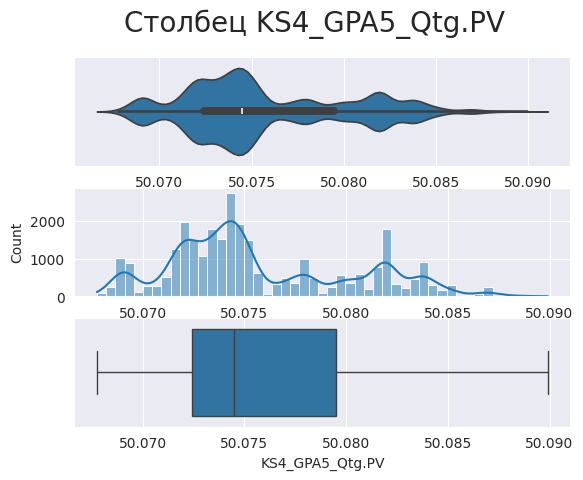

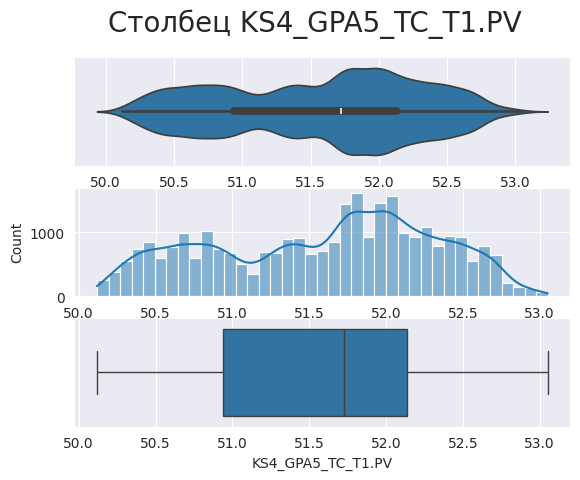

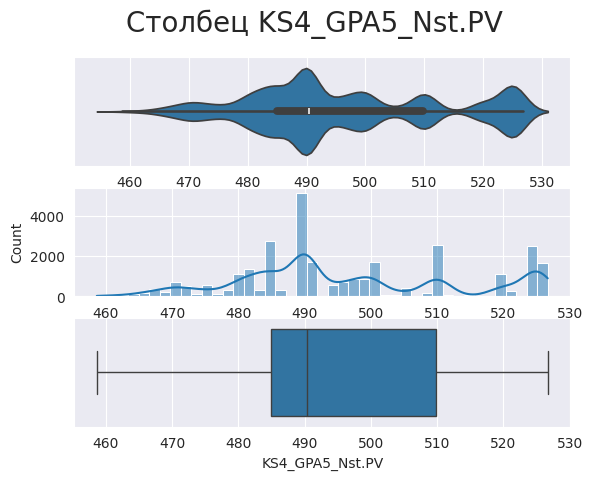

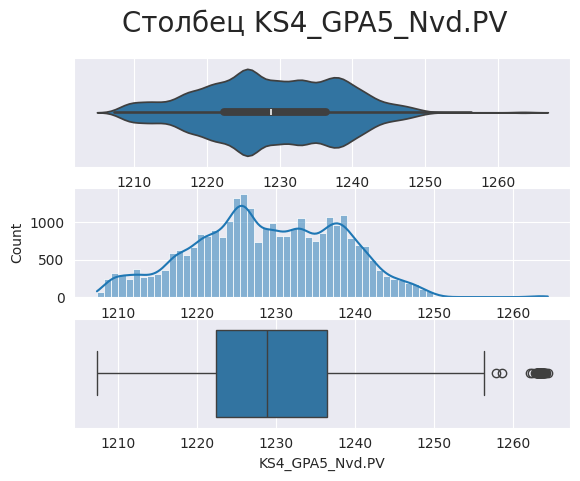

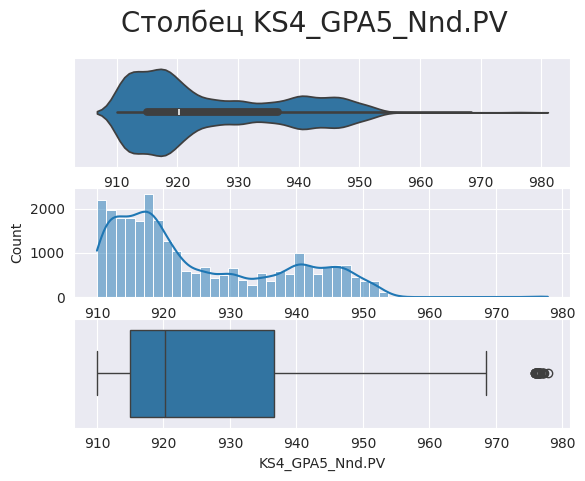

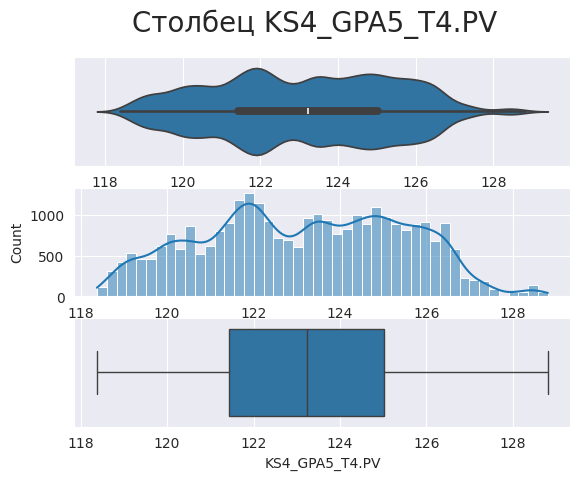

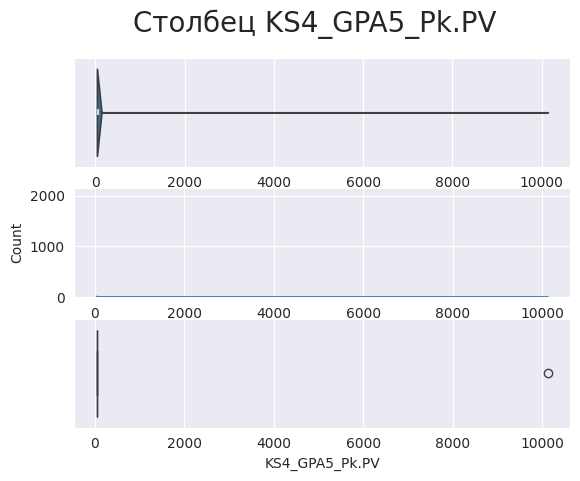

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in columns:
    fig, ax = plt.subplots(3, 1)  # figsize=(10,5))
    fig.suptitle(f'Столбец {column}', fontsize=20)
    sns.violinplot(ax=ax[0], x=df[column])
    sns.histplot(x=df[column], kde=True, ax=ax[1])
    sns.boxplot(x=df[column])
    plt.show()


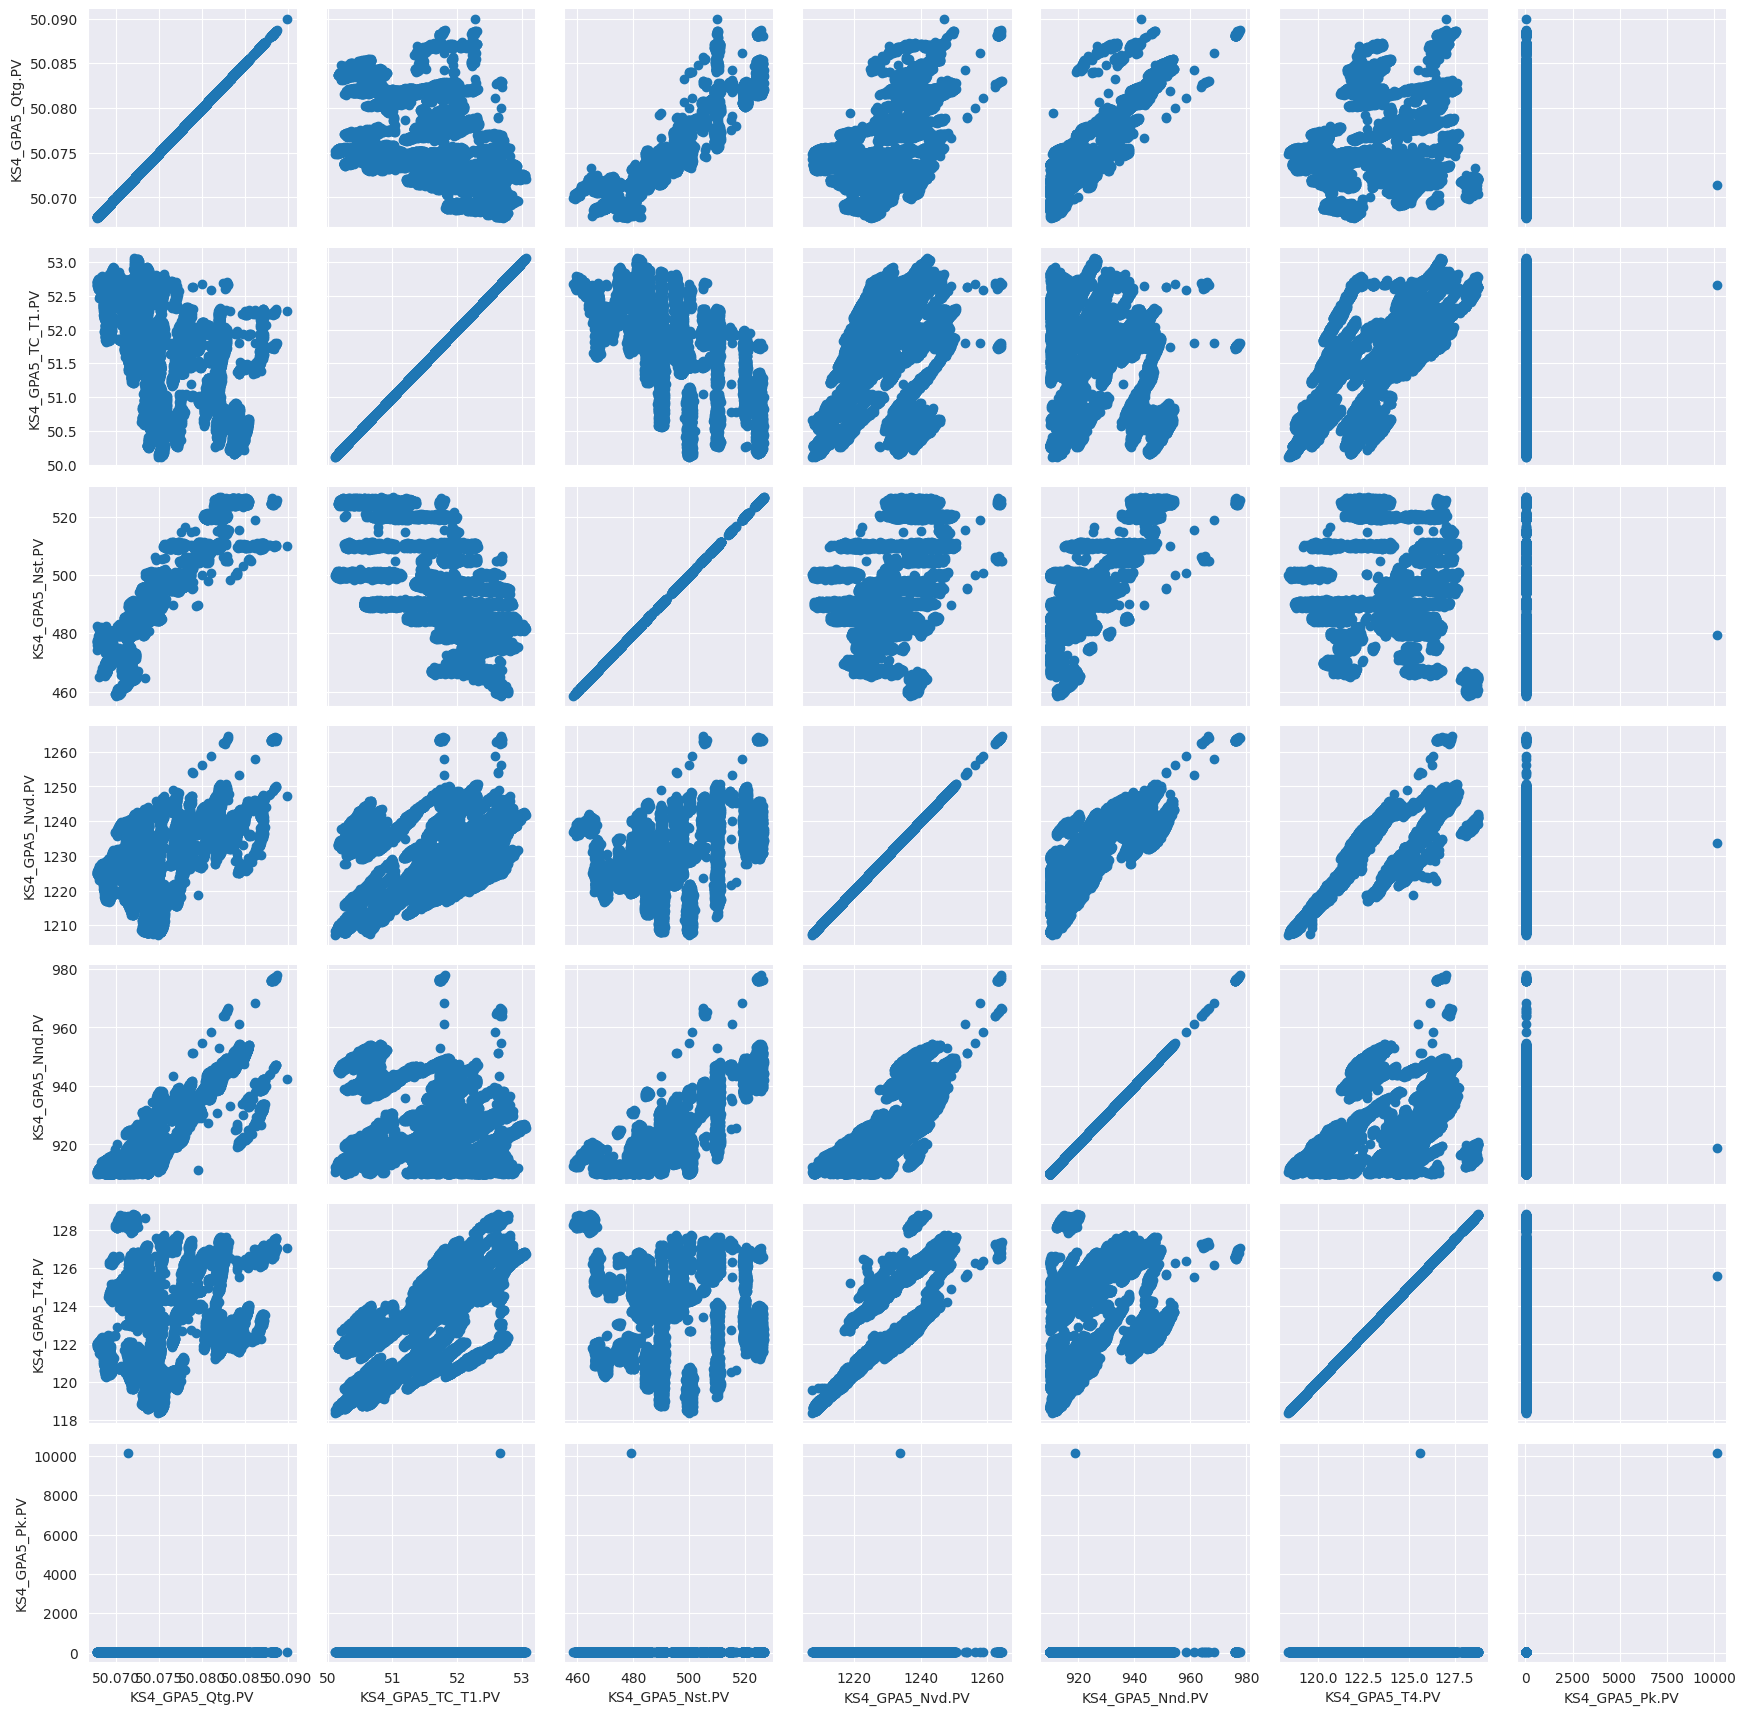

In [39]:
# Диаграмма рассеивания
pair_grid_plot = sns.PairGrid(df)
pair_grid_plot.map(plt.scatter)

In [40]:
# корреляция
corr = df.corr()
corr

,KS4_GPA5_Qtg.PV,KS4_GPA5_TC_T1.PV,KS4_GPA5_Nst.PV,KS4_GPA5_Nvd.PV,KS4_GPA5_Nnd.PV,KS4_GPA5_T4.PV,KS4_GPA5_Pk.PV
KS4_GPA5_Qtg.PV,1.000000,-0.543281,0.933254,0.579065,0.918967,0.123209,-0.004665
KS4_GPA5_TC_T1.PV,-0.543281,1.000000,-0.655131,0.303891,-0.361735,0.674684,0.007792
KS4_GPA5_Nst.PV,0.933254,-0.655131,1.000000,0.444917,0.866249,-0.040373,-0.004886
KS4_GPA5_Nvd.PV,0.579065,0.303891,0.444917,1.000000,0.775862,0.769571,0.003303
KS4_GPA5_Nnd.PV,0.918967,-0.361735,0.866249,0.775862,1.000000,0.255945,-0.002107
KS4_GPA5_T4.PV,0.123209,0.674684,-0.040373,0.769571,0.255945,1.000000,0.005918
KS4_GPA5_Pk.PV,-0.004665,0.007792,-0.004886,0.003303,-0.002107,0.005918,1.000000


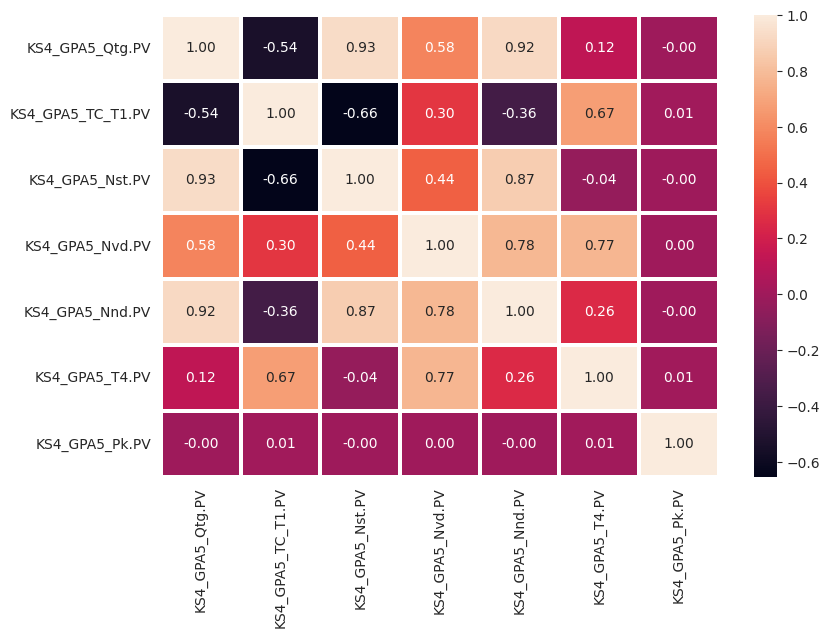

In [41]:
# таблица корреляций
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=1.5, fmt='.2f', ax=ax)
plt.show()

# Пропуски

In [179]:
# пропущенные значения NaN
print(df.isnull().any())
print(df.isna().any())

KS4_GPA5_Qtg.PV      False
KS4_GPA5_TC_T1.PV    False
KS4_GPA5_Nst.PV      False
KS4_GPA5_Nvd.PV      False
KS4_GPA5_Nnd.PV       True
KS4_GPA5_T4.PV       False
KS4_GPA5_Pk.PV       False
dtype: bool
KS4_GPA5_Qtg.PV      False
KS4_GPA5_TC_T1.PV    False
KS4_GPA5_Nst.PV      False
KS4_GPA5_Nvd.PV      False
KS4_GPA5_Nnd.PV       True
KS4_GPA5_T4.PV       False
KS4_GPA5_Pk.PV       False
dtype: bool


In [180]:
print(df.isnull().sum())
print(df.isna().sum())

KS4_GPA5_Qtg.PV         0
KS4_GPA5_TC_T1.PV       0
KS4_GPA5_Nst.PV         0
KS4_GPA5_Nvd.PV         0
KS4_GPA5_Nnd.PV      2001
KS4_GPA5_T4.PV          0
KS4_GPA5_Pk.PV          0
dtype: int64
KS4_GPA5_Qtg.PV         0
KS4_GPA5_TC_T1.PV       0
KS4_GPA5_Nst.PV         0
KS4_GPA5_Nvd.PV         0
KS4_GPA5_Nnd.PV      2001
KS4_GPA5_T4.PV          0
KS4_GPA5_Pk.PV          0
dtype: int64


у столбца KS4_GPA5_Nnd.PV (2001) есть пропуски

In [181]:
# KS4_GPA5_Nnd.PV больше всего коррелирует с KS4_GPA5_Qtg.PV
sub_df = df.filter(items=['KS4_GPA5_Nnd.PV', 'KS4_GPA5_Qtg.PV'])

выделим сабсеты где не хватает данных, и где хватает 

In [182]:
empty = sub_df[sub_df['KS4_GPA5_Nnd.PV'].isnull() | sub_df['KS4_GPA5_Nnd.PV'].isna()]
empty

,KS4_GPA5_Nnd.PV,KS4_GPA5_Qtg.PV
10000,NaN,50.071444
10001,NaN,50.071375
10002,NaN,50.071383
10003,NaN,50.071465
10004,NaN,50.071366
...,...,...
11996,NaN,50.074768
11997,NaN,50.074719
11998,NaN,50.074801
11999,NaN,50.074721


In [183]:
not_empty = sub_df[sub_df['KS4_GPA5_Nnd.PV'].notnull() & sub_df['KS4_GPA5_Nnd.PV'].notna()]
not_empty

,KS4_GPA5_Nnd.PV,KS4_GPA5_Qtg.PV
0,912.161426,50.074285
1,914.203027,50.074926
2,914.924512,50.074836
3,915.881055,50.074957
4,916.435645,50.075145
...,...,...
29707,914.571973,50.070496
29708,913.476074,50.070217
29709,913.913086,50.070292
29710,913.895508,50.070389


In [195]:
from sklearn.linear_model import LinearRegression
import numpy as np

reg = LinearRegression()
X = np.array(not_empty['KS4_GPA5_Qtg.PV']).reshape((not_empty['KS4_GPA5_Qtg.PV'].shape[0], 1))
reg.fit(X, not_empty['KS4_GPA5_Nnd.PV'])
X = np.array(empty['KS4_GPA5_Qtg.PV']).reshape((empty['KS4_GPA5_Qtg.PV'].shape[0], 1))
predictions = reg.predict(X)
X = X.reshape(X.shape[0])

for i, p in zip(empty.index, predictions):
    df.loc[i, 'KS4_GPA5_Nnd.PV'] = p

print(df.isnull().sum())
print(df.isna().sum())

KS4_GPA5_Qtg.PV      0
KS4_GPA5_TC_T1.PV    0
KS4_GPA5_Nst.PV      0
KS4_GPA5_Nvd.PV      0
KS4_GPA5_Nnd.PV      0
KS4_GPA5_T4.PV       0
KS4_GPA5_Pk.PV       0
dtype: int64
KS4_GPA5_Qtg.PV      0
KS4_GPA5_TC_T1.PV    0
KS4_GPA5_Nst.PV      0
KS4_GPA5_Nvd.PV      0
KS4_GPA5_Nnd.PV      0
KS4_GPA5_T4.PV       0
KS4_GPA5_Pk.PV       0
dtype: int64


array([914.21592158, 914.04352352, 914.06393658, ..., 922.65082821,
       922.44957479, 922.44957479])